In [1]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_PL = df[df["job_country"] == "Poland"].dropna(subset=["salary_year_avg"])

In [3]:
job_titles = df_PL["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Senior Data Scientist']

In [4]:
df_PL_top6 = df_PL[df_PL["job_title_short"].isin(job_titles)]

In [5]:
job_order = df_PL_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

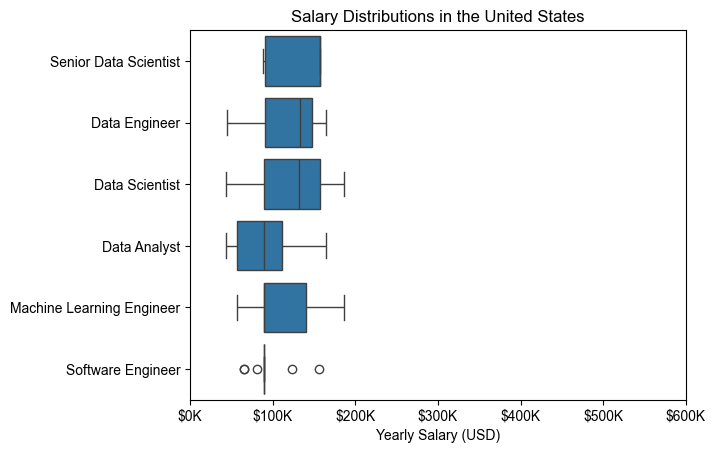

In [6]:
sns.boxplot(data=df_PL_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style="ticks")

plt.title("Salary Distributions in the United States")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')

plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


In [7]:
df_DA_PL = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "Poland")].copy()

df_DA_PL = df_DA_PL.dropna(subset=["salary_year_avg"])

df_DA_PL = df_DA_PL.explode("job_skills")

In [8]:
df_DA_top_pay = df_DA_PL.groupby('job_skills')["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [9]:
df_DA_skills = df_DA_PL.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by="median", ascending=False)
df_DA_skills

,count,median
job_skills,,
bigquery,1,111175.0
sql,2,106837.5
tableau,2,106837.5
python,3,102500.0
airflow,1,102500.0
flow,1,102500.0
git,1,102500.0
hadoop,1,102500.0
gcp,1,102500.0


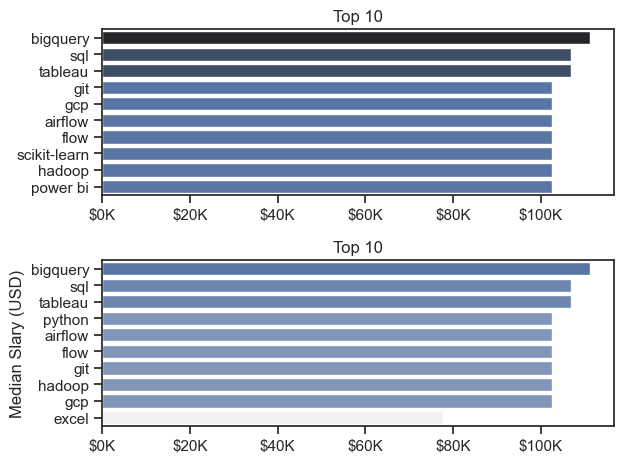

In [10]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r")
ax[0].legend().remove()
ax[0].set_title("Top 10")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:b")
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10")
ax[1].set_xlabel("")
ax[1].set_ylabel("Median Slary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()